                                        INTERN NAME: ASHUTOSH MAURYA
    TASK3 : Exploratory Data Analysis - Retail
    INTERNSHIP NAME : DATA SCIENCE AND BUSINESS ANALYTICS
    INTERNSHIP PROVIDER : The Sparks Foundation
    PROGRAM : Graduate Rotational Internship Program


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

IMPORT THE DATASET FROM CSV FILE

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


SIZE OF THE DATASET

In [3]:
df.shape

(9994, 13)

DETAILS OF THE DATASET

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


MISSING VALUE OF THE DATASET

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

DUPLICATED VALUE IN DATASET

In [7]:
df.duplicated().sum()

17

DELETE DUPLICATE VALUE IN DATASET

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(9977, 13)

COLUMNS IN DATASET

In [10]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

UNIQUE VALUE IN DATASET

In [11]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

UNIQUE VALUE IN EACH COLUMN IN DATASET

In [12]:
for column in df:
    print(column,':',df[column].unique())
    print("-"*80)

Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
--------------------------------------------------------------------------------
Segment : ['Consumer' 'Corporate' 'Home Office']
--------------------------------------------------------------------------------
Country : ['United States']
--------------------------------------------------------------------------------
City : ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Ca

THE United States UNIQUE IN EACH ROWS SHOW DELETE IT

In [13]:
df=df.drop(columns="Country")

In [14]:
df=df.drop(columns="Postal Code")

In [15]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

AFTER CLEANING THE DATASET

In [16]:
df.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


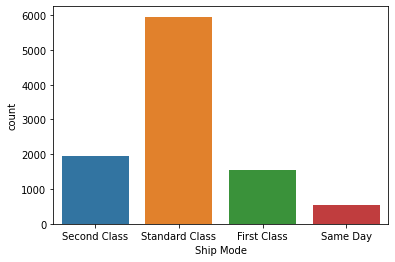

In [17]:
sns.countplot(x='Ship Mode', data=df)
plt.show()

STANDARD CLASS HAS BEEN SOLD MOST, LEAST ONES ON SAME DAY

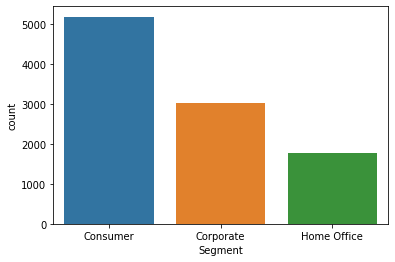

In [18]:
sns.countplot(x='Segment',data=df)
plt.show()

CONSUMER SEGMENT ARE THE ONES WHO BUY MOST OF THE PRODUCTS

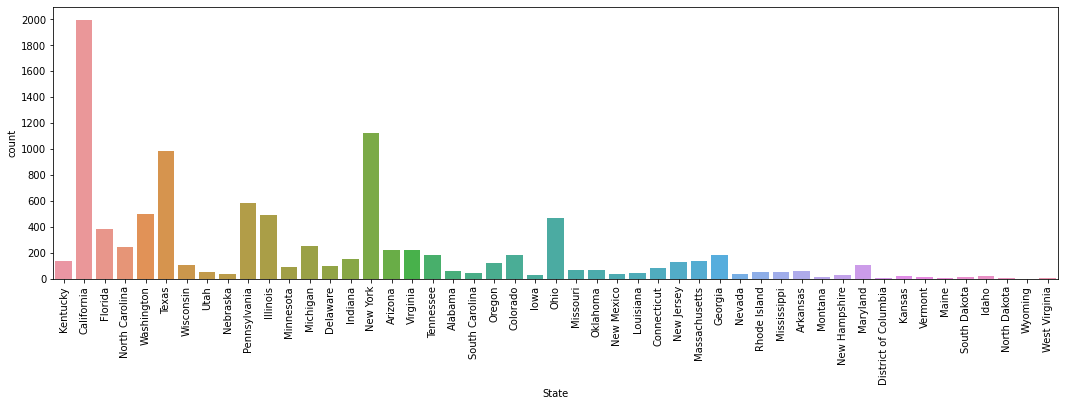

In [19]:
plt.figure(figsize=[18,5])
sns.countplot(x='State', data=df)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,2200,200))
plt.show()

PRODUCT COUNT OF EACH STATE IN DATASET

In [20]:
df_state=df['State'].value_counts()
df_state

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

    California HAVING THE HIGHEST WHICH IS 1996 AND Wyoming WITH LEST WHICH IS 1.

PRODUCT COUNTING REGION WISE

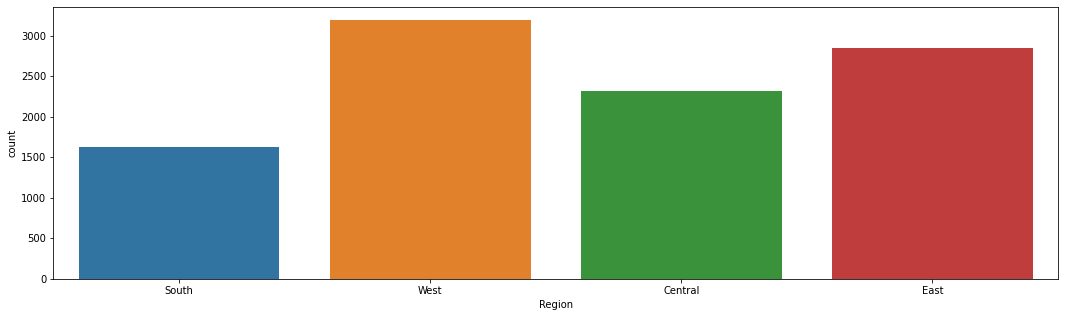

In [21]:
plt.figure(figsize=[18,5])
sns.countplot(x='Region',data=df)
plt.show()

    WEST REGION HAVEING IS THE HIGHEST AND SOUTH REGION IS LOWEST

PRODUCT COUNTING CATEGORY WISE

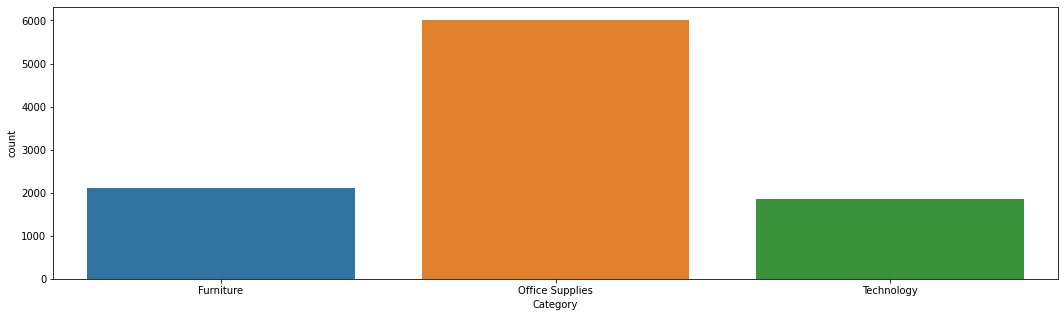

In [22]:
plt.figure(figsize=[18,5])
sns.countplot(x='Category',data=df)
plt.show()

    OFFICE SUPPLIES CATEGORY HAVEING IS THE HIGHEST AND TECHNOLOGY CATEGORY IS LOWEST

PRODUCT COUNTING SUB-CATEGORY WISE

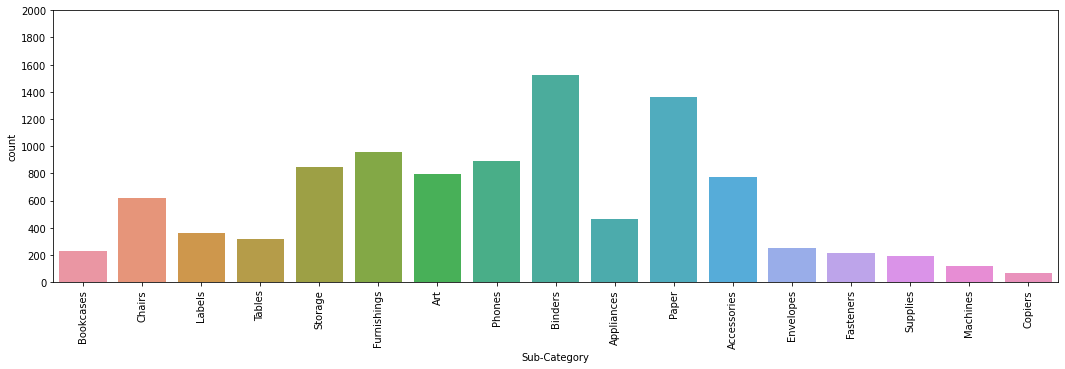

In [23]:
plt.figure(figsize=[18,5])
sns.countplot(x='Sub-Category', data=df)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,2200,200))
plt.show()

    BINDERS SUB-CATEGORY HAVEING IS THE HIGHEST AND COPIERS SUB-CATEGORY IS LOWEST

SKEWNESS OF THE PROFIT DATA

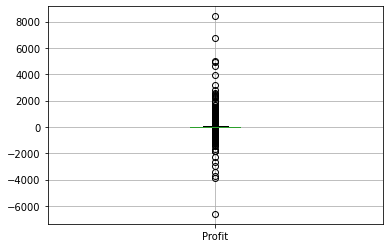

Value of skewness:  7.554748459862763


In [24]:
df.boxplot(column=['Profit'])
plt.show()
print('Value of skewness: ', df['Profit'].skew())

    PROFIT IS SHOW MUCH SKEWED, MEANS THERE ARE MANY OUTLIERS IN THE DATASET

RELATIONSHIP ANALYSIS: EACH FEATURE RELATION WITH EACH OTHER FEATURE

<AxesSubplot:>

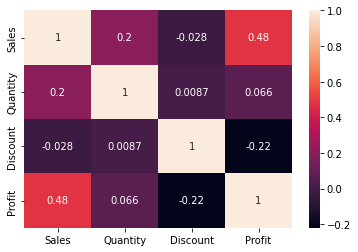

In [25]:
corr=df.corr(method='pearson')
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

    IN ABOVE GRAPH THE DIFFERENT RELATIONS WHICH IS POSITIVE AND NEGATIVE B/W THE FETAURES 

RELATION B/W FEATURES USING PAIRPLOT

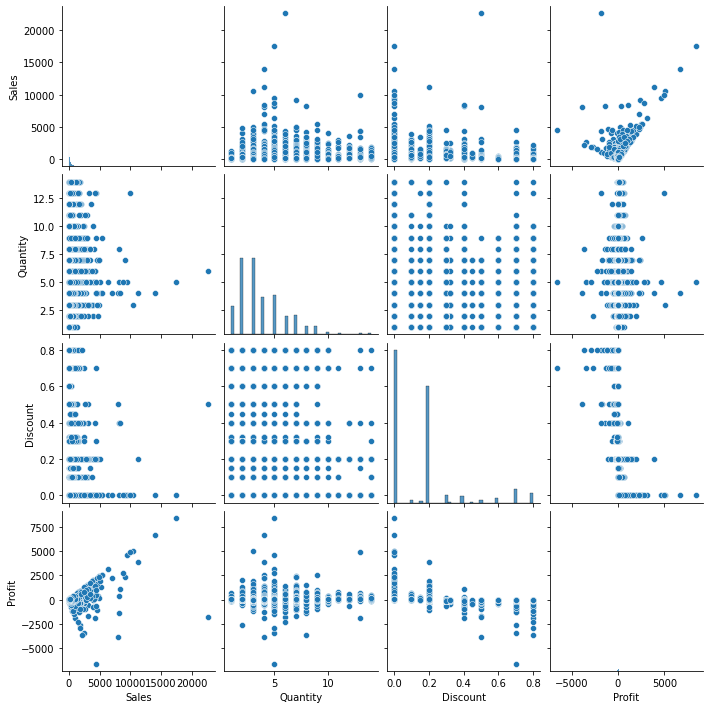

In [26]:
sns.pairplot(df)
plt.show()

    USING PAIRPLOT, NOT SO MUCH DECISIVE

ANALYSIS ASICIATED WITH SALES, DISCOUNT AND PROFIT WITH RESPECT TO SHIP MODE

In [27]:
df_ship=df.groupby(['Ship Mode'])[['Sales', 'Discount','Profit']].mean()
df_ship

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.614490,0.164587,31.850134
Same Day,236.755950,0.152675,29.283924
Second Class,236.323750,0.138626,29.565956
Standard Class,227.928858,0.160222,27.534715


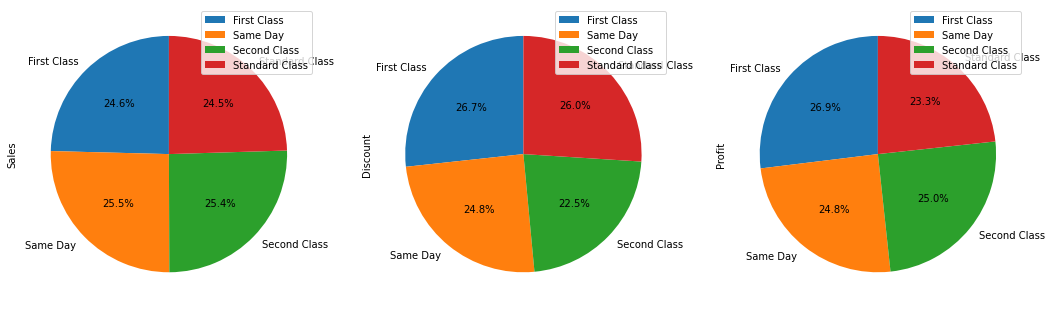

In [28]:
df_ship.plot.pie(subplots=True, figsize=(18,18),autopct='%1.1f%%',startangle=90)
plt.show()

    IN THE ABOVE:
    PROFIT AND DISCOUNT IS MOST IN FIRST CLASS AND SALES IS MOST ME DAY(SHIP MODE)
    SALES AND PROFIT IS LEAST IN STANDARD CLASS AND LEAST DISCOUNT IN SECOND CLASS 

WITH RESPECT TO SEGMENT

In [29]:
df_seg=df['Segment'].value_counts().sort_index()
df_seg

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

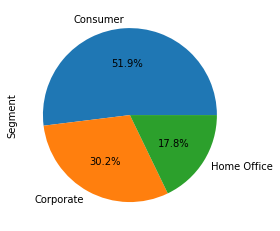

In [30]:
df_seg.plot.pie(autopct='%1.1f%%',startangle=0)
plt.show()


    CONSUMER SEGMENT HAS THE MOST PRODUCTS SOLD

ANALYSIS ASOCIATED WITH SALES, DISCOUNT AND PROFIT WITH RESPECT TO SEGMENTS

In [31]:
df_seg=df.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
df_seg

,Sales,Discount,Profit
Segment,,,
Consumer,223.969279,0.158308,25.855188
Corporate,234.185781,0.158159,30.499164
Home Office,241.311234,0.147178,33.883643


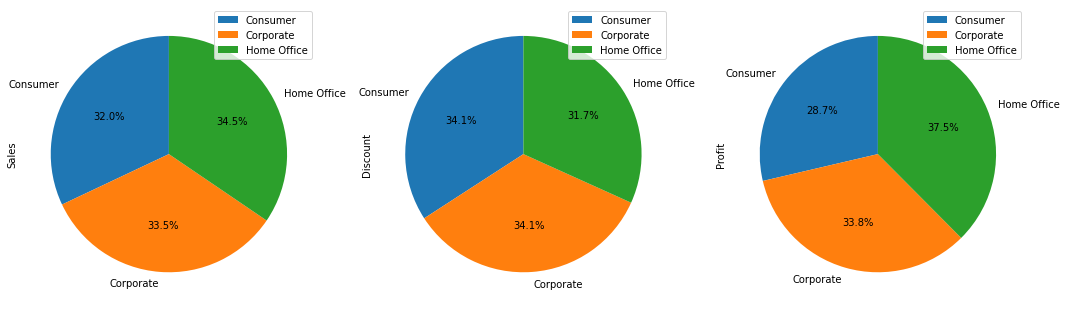

In [32]:
df_seg.plot.pie(subplots=True,figsize=(18,18),autopct="%1.1f%%",startangle=90)
plt.show()

    IN THE ABOVE:
    MOST OF THE SALES DONE BY HOME OFFICE
    MOST OF THE DISCOUNT GIVEN IN A TIE B/W CONSUMER CORPORATE 

WITH RESPECT TO REGION

In [33]:
df_reg=df['Region'].value_counts().sort_index()
df_reg

Central    2319
East       2845
South      1620
West       3193
Name: Region, dtype: int64

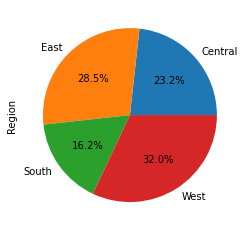

In [34]:
df_reg.plot.pie(autopct='%1.1f%%',startangle=0)
plt.show()


    PROFIT IS MORE IN WEST REGION AND LEAST IN SOUTH REGION
    DISCOUNT IS PROVIDED MORE IN SOUTH REGION AND LEAST IN WEST REGION

ANALYSIS WITH RESPECT TO REGION vs PROFIT FOR DIFFERENT CATEGORIES

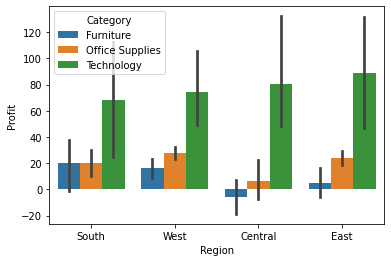

In [35]:
sns.barplot(data=df,x='Region', y='Profit',hue='Category')
plt.show()

    IN THE ABOVE:
    WE CAN SEE THAT CENTRAL REGION HAS NEGATIVE PROFITS FOR FURNITURE CATEGORY &,
    EAST REGION HAS HIGHEST PROFIT IS FOR TECHNOLOGY CATEGORY

ANALYSIS WITH RESPECT TO REGION vs PROFIT FOR DIFFERENT CATEGORIES

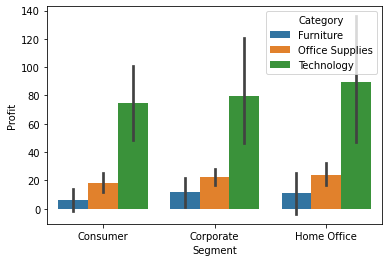

In [36]:
sns.barplot(data=df,x='Segment',y='Profit',hue='Category')
plt.show()

    IN THE ABOVE:
    WE CAN SEE THAT HOME OFFICE SEGMENT HAS HIGHEST PROFITS FOR TECHNOLOGY CATEGORY &,
    CONSUMER SEGMENT HAS LEAST PROFIT IS FOR FURNITURE CATEGORY

WITH RESPECT TO STATE

In [37]:
df_state=df['State'].value_counts().sort_index()
print('Average Sales in STATE', round(df_state.mean()))

Average Sales in STATE 204


In [38]:
df_state=df.groupby(['State'])[['Sales','Discount','Profit']].mean()
df_state=df.sort_values('Profit',ascending=False)
df_state.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,Lafayette,Indiana,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,Seattle,Washington,West,Technology,Copiers,13999.960,4,0.0,6719.9808
4190,Standard Class,Consumer,Newark,Delaware,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,Detroit,Michigan,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,Minneapolis,Minnesota,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
2623,First Class,Home Office,New York City,New York,East,Technology,Copiers,11199.968,4,0.2,3919.9888
509,Standard Class,Consumer,Atlanta,Georgia,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750
8488,Second Class,Consumer,Arlington,Virginia,South,Technology,Machines,8749.950,5,0.0,2799.9840
7666,Standard Class,Home Office,Providence,Rhode Island,East,Technology,Copiers,5399.910,9,0.0,2591.9568
6520,Second Class,Consumer,Jackson,Michigan,Central,Office Supplies,Binders,5443.960,4,0.0,2504.2216


In [39]:
df_subcategory=df['Sub-Category'].value_counts().sort_index()
df_subcategory

Accessories     775
Appliances      466
Art             795
Binders        1522
Bookcases       228
Chairs          615
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     956
Labels          363
Machines        115
Paper          1359
Phones          889
Storage         846
Supplies        190
Tables          319
Name: Sub-Category, dtype: int64

WITH RESPECT TO SUB-CATEGORY

In [40]:
df_subcategory=df.groupby(['Sub-Category'])[['Sales','Discount','Profit']].mean()
df_subcategory=df_subcategory.sort_values('Sales',ascending=False)
df_subcategory

,Sales,Discount,Profit
Sub-Category,,,
Copiers,2198.941618,0.161765,817.909190
Machines,1645.553313,0.306087,29.432669
Tables,648.794771,0.261285,-55.565771
Chairs,532.971969,0.170244,43.198582
Bookcases,503.859633,0.211140,-15.230509
Phones,371.211534,0.154556,50.073938
Storage,264.590553,0.074704,25.152277
Supplies,245.650200,0.076842,-6.258418
Appliances,230.755710,0.166524,38.922758


WITH RESPECT TO QUANTITY

In [41]:
df_quant=df['Quantity'].value_counts().sort_values(ascending=False)
df_quant

3     2400
2     2399
5     1230
4     1186
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [42]:
df_quant=df.groupby(['Quantity'])[['Sales','Discount','Profit']].mean()
df_quant=df_quant.sort_index()
df_quant

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.377982,0.154844,16.027769
3,175.630896,0.153321,23.720306
4,272.779827,0.158373,37.227971
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


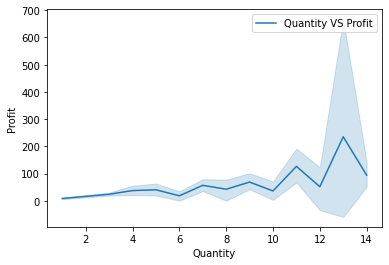

In [43]:
sns.lineplot(x='Quantity',y='Profit',data=df,label='Quantity VS Profit')
plt.show()

    PROFIT INCREASES WITH RESPECT TO QUANTITY

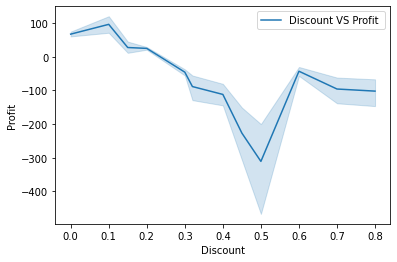

In [44]:
sns.lineplot(x='Discount',y='Profit',data=df,label='Discount VS Profit ')
plt.show()

    PROFIT DECREASES WITH RESPECT TO DISCOUNT